In [3]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import scipy.stats as st
import statsmodels.stats.proportion as smp

In [4]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


Let's check the features present in our data and then we will look at their data types.

In [5]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

It can be infered that **subscribed** is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.

In [7]:
train.shape, test.shape

((31647, 18), (13564, 17))

We have 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. We have similar features in the test dataset as the train dataset except the subscribed. We will predict the subscribed with the help of model built using the train data.

Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [8]:
# Print data types for each variable
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see there are two format of data types:

1. **object**: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. **int64**: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [9]:
#printing first five rows of the dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


Next we will look for any missing values in the dataset.

In [10]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

No null values to treat

## Univariate Analysis

Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [11]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [12]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

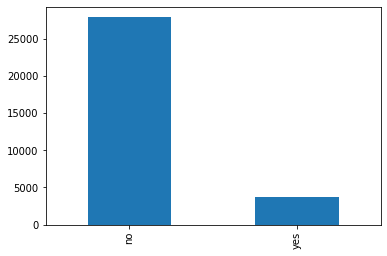

In [13]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()
plt.show()

So, 3715 users out of total 31647 have subscribed which is around 12%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look  at the distribution of age variable to see how many people belongs to a particular age group.

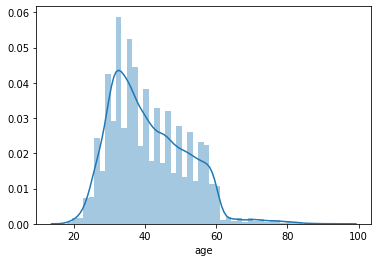

In [14]:
sns.distplot(train["age"])

We can infer that most of the clients fall in the age group between 20-60. The age is right skewed it means there are few old customers.

Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table

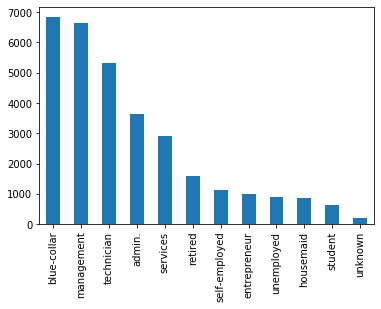

In [15]:
train['job'].value_counts().plot.bar()
plt.show()

We see that most of the clients belongs to blue-collar job and the students are least in number as students generally do not take a term deposit. 

Let's also look at how many clients have default history.


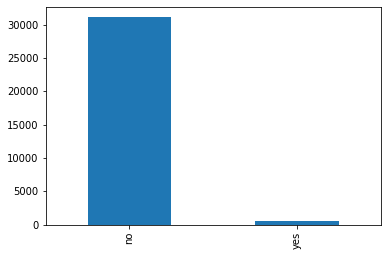

In [16]:
train['default'].value_counts().plot.bar()
plt.show()

More than 90% of the clients have no default history.

Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables.
 Let's start with job and subscribed variable.

## Bivariate Analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

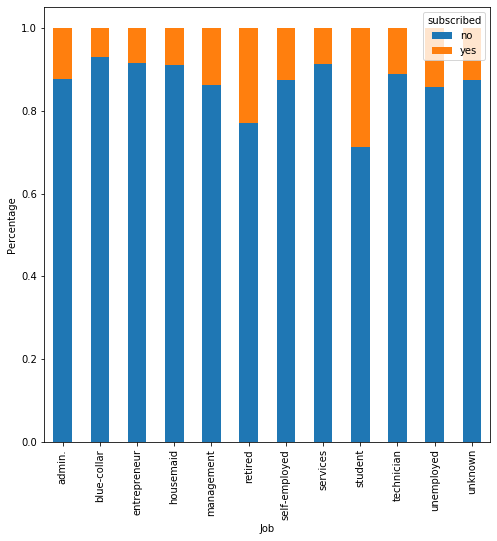

In [17]:

print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Next, let's explore the default variable against the subscribed variable.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

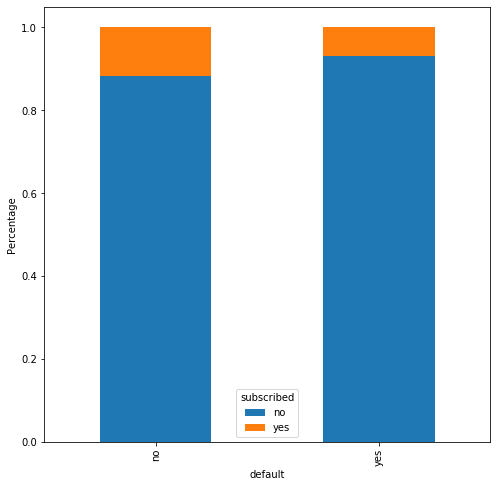

In [18]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.



Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [19]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)
train.subscribed=train.subscribed.astype('int64')

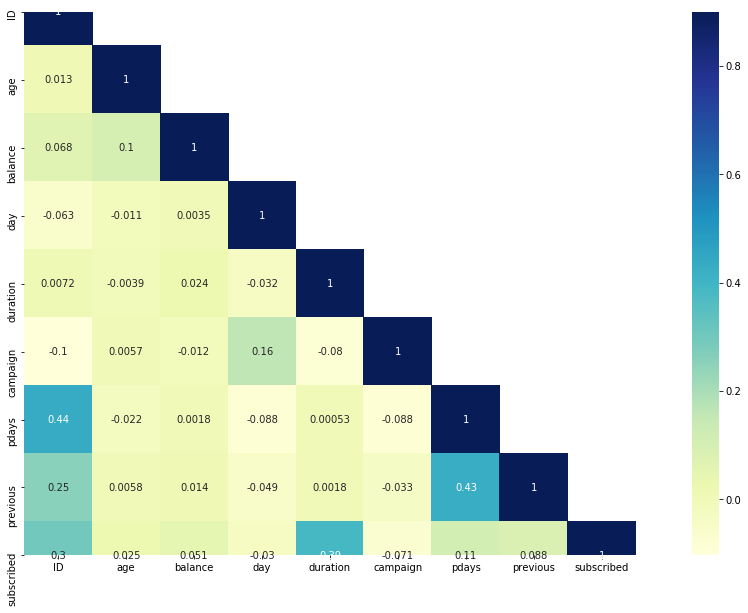

In [19]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

.



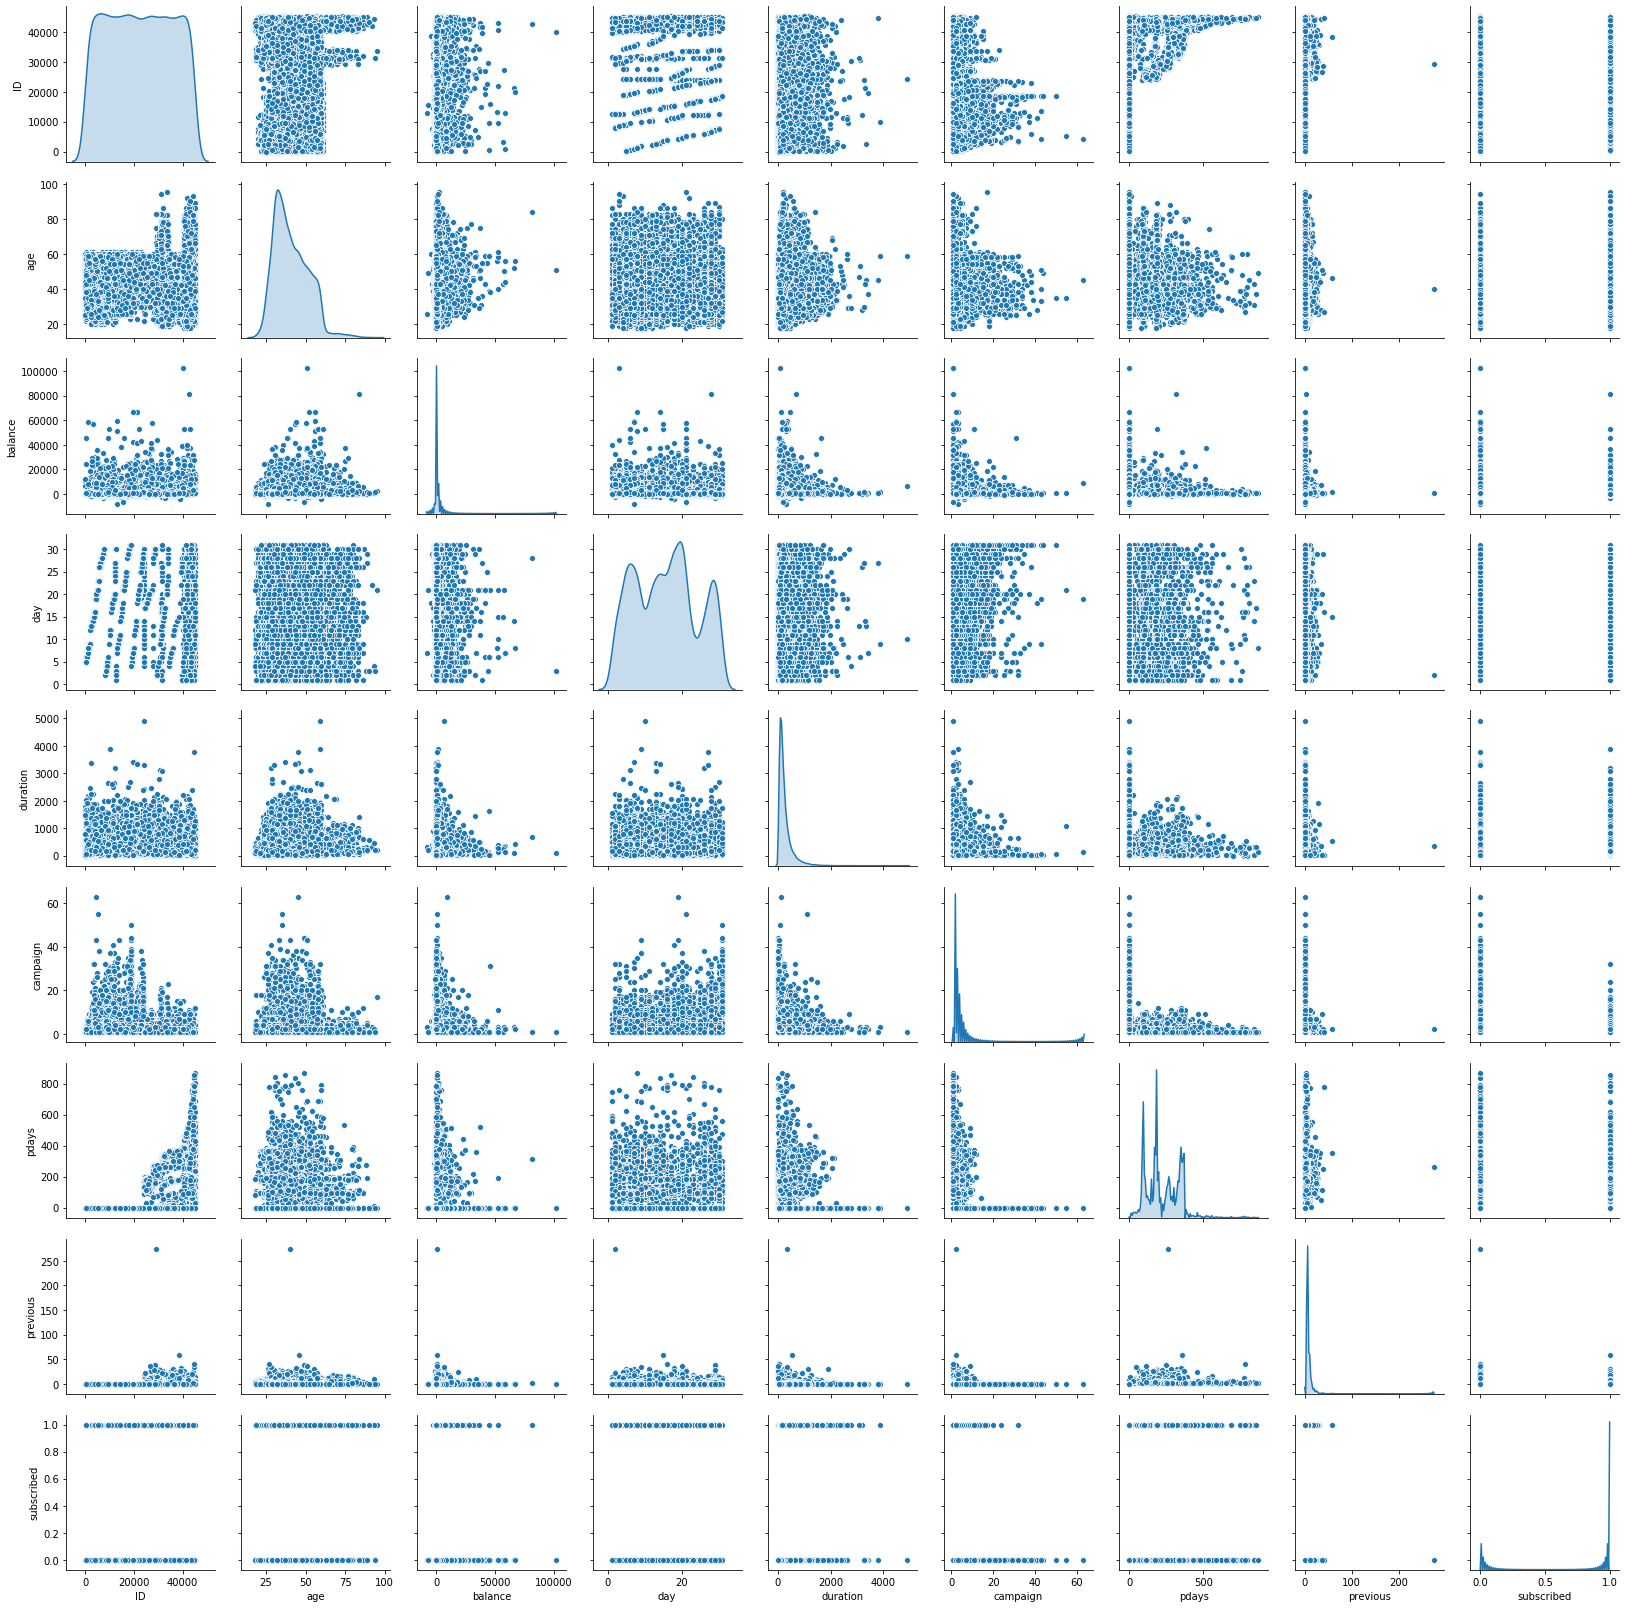

In [20]:
sns.pairplot(train,diag_kind='kde')
plt.show()

In [20]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


### Stastical significance of the features

1. Normality check for Numerical Columns

In [22]:
pd.Series(['Normal' if (st.anderson(train[i])[0]<st.anderson(train[i])[1][2]) else 'Not Normal' for i in train.drop(columns=['subscribed','ID','job','marital','education','default','housing','loan','contact','month','poutcome'])],index=train.drop(columns=['subscribed','ID','job','marital','education','default','housing','loan','contact','month','poutcome']).columns)

age         Not Normal
balance     Not Normal
day         Not Normal
duration    Not Normal
campaign    Not Normal
pdays       Not Normal
previous    Not Normal
dtype: object

2. Significance Test

In [23]:
# Age and Target

print('Significance Test:',st.mannwhitneyu(train[train.subscribed==1].age,train[train.subscribed==0].age))

# pvalue>alpha(0.05) significance level
# Not significant features
# But we will keep this for now

Significance Test: MannwhitneyuResult(statistic=51187589.0, pvalue=0.09155027138033778)


In [24]:
# Job and Target
table=pd.crosstab(train.job,train.subscribed)
_,pval,_,_=st.chi2_contingency(table)
print('Significance Test pvalue:',pval)

# pvalue<alpha(0.05) significance level
# significant feature

Significance Test pvalue: 3.6010336114362163e-119


In [25]:
# Marital and Target
table=pd.crosstab(train.marital,train.subscribed)
_,pval,_,_=st.chi2_contingency(table)
print('Significance Test pvalue:',pval)

# pvalue<alpha(0.05) significance level
# significant feature

Significance Test pvalue: 5.195445069769366e-34


In [26]:
# Education and Target
table=pd.crosstab(train.education,train.subscribed)
_,pval,_,_=st.chi2_contingency(table)
print('Significance Test pvalue:',pval)

# pvalue<alpha(0.05) significance level
# significant feature

Significance Test pvalue: 8.821191631944316e-38


In [27]:
# Default and Target
table=pd.crosstab(train.default,train.subscribed)
_,pval,_,_=st.chi2_contingency(table)
print('Significance Test pvalue:',pval)

# pvalue<alpha(0.05) significance level
# significant feature

Significance Test pvalue: 0.00042681039656274696


In [28]:
# Balance and Target

print('Significance Test:',st.mannwhitneyu(train[train.subscribed==1].balance,train[train.subscribed==0].balance))

# pvalue<alpha(0.05) significance level
# Significant Feature

Significance Test: MannwhitneyuResult(statistic=42398846.5, pvalue=8.415669797077851e-74)


In [29]:
# Housing and Target
table=pd.crosstab(train.housing,train.subscribed)
_,pval,_,_=st.chi2_contingency(table)
print('Significance Test pvalue:',pval)

# pvalue<alpha(0.05) significance level
# significant feature

Significance Test pvalue: 7.801523512528638e-139


In [30]:
# Loan and Target
table=pd.crosstab(train.loan,train.subscribed)
_,pval,_,_=st.chi2_contingency(table)
print('Significance Test pvalue:',pval)

# pvalue<alpha(0.05) significance level
# significant feature

Significance Test pvalue: 1.0844353350935101e-37


In [31]:
# Contact and Target
table=pd.crosstab(train.contact,train.subscribed)
_,pval,_,_=st.chi2_contingency(table)
print('Significance Test pvalue:',pval)

# pvalue<alpha(0.05) significance level
# significant feature

Significance Test pvalue: 2.1898246172294052e-160


In [32]:
# Balance and Target

print('Significance Test:',st.mannwhitneyu(train[train.subscribed==1].day,train[train.subscribed==0].day))

# pvalue<alpha(0.05) significance level
# Significant Feature

Significance Test: MannwhitneyuResult(statistic=49030447.5, pvalue=2.4054794737945533e-08)


In [33]:
# Month and Target
table=pd.crosstab(train.month,train.subscribed)
_,pval,_,_=st.chi2_contingency(table)
print('Significance Test pvalue:',pval)

# pvalue<alpha(0.05) significance level
# significant feature

Significance Test pvalue: 0.0


In [34]:
# Duration and Target

print('Significance Test:',st.mannwhitneyu(train[train.subscribed==1].duration,train[train.subscribed==0].duration))

# pvalue<alpha(0.05) significance level
# Significant Feature

Significance Test: MannwhitneyuResult(statistic=20211554.0, pvalue=0.0)


In [35]:
# Campaign and Target

print('Significance Test:',st.mannwhitneyu(train[train.subscribed==1].campaign,train[train.subscribed==0].campaign))

# pvalue<alpha(0.05) significance level
# Significant Feature

Significance Test: MannwhitneyuResult(statistic=44705275.5, pvalue=7.993821516907156e-47)


In [36]:
# pdays and Target

print('Significance Test:',st.mannwhitneyu(train[train.subscribed==1].pdays,train[train.subscribed==0].pdays))

# pvalue<alpha(0.05) significance level
# Significant Feature

Significance Test: MannwhitneyuResult(statistic=41987583.0, pvalue=3.913750484582986e-175)


In [37]:
# Previous and Target

print('Significance Test:',st.mannwhitneyu(train[train.subscribed==1].previous,train[train.subscribed==0].previous))

# pvalue<alpha(0.05) significance level
# Significant Feature

Significance Test: MannwhitneyuResult(statistic=41103591.5, pvalue=1.5587353609960683e-207)


In [38]:
# Poutcome and Target
table=pd.crosstab(train.poutcome,train.subscribed)
_,pval,_,_=st.chi2_contingency(table)
print('Significance Test pvalue:',pval)

# pvalue<alpha(0.05) significance level
# significant feature

Significance Test pvalue: 0.0


As seen from the significance result of different columns it is observed that age columns is not significant all other columns are significant.

Let's make our age column categorical by dividing it in 5 equal parts

In [26]:
pd.cut(train.age,5)

0          (48.8, 64.2]
1        (17.923, 33.4]
2        (17.923, 33.4]
3          (48.8, 64.2]
4        (17.923, 33.4]
              ...      
31642    (17.923, 33.4]
31643      (48.8, 64.2]
31644    (17.923, 33.4]
31645      (48.8, 64.2]
31646      (48.8, 64.2]
Name: age, Length: 31647, dtype: category
Categories (5, interval[float64]): [(17.923, 33.4] < (33.4, 48.8] < (48.8, 64.2] < (64.2, 79.6] < (79.6, 95.0]]

In [27]:
def convert(data):
    data1=data.copy()
    data1['age_cat']=[1 if(i<33.4) else 2 if (i>=33.4 and i<48.8) else 3 if (i>=48.8 and i<64.2) else 4 if (i>=64.2 and i<79.6) else 5 for i in data.age]
    return data1.drop(columns='age')
    

In [28]:
data=convert(train)

In [29]:
data.head()

,ID,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_cat
0,26110,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0,3
1,40576,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0,1
2,15320,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0,1
3,43962,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1,3
4,29842,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0,1


In [30]:
# Age_categorical and Target
table=pd.crosstab(data.age_cat,data.subscribed)
_,pval,_,_=st.chi2_contingency(table)
print('Significance Test pvalue:',pval)

# pvalue<alpha(0.05) significance level
# significant feature

Significance Test pvalue: 6.937125601492469e-118


In [31]:
#user defined function to change the object datatype to category datatype and then convert it into numerical form.
def cat_num(df):
    data=df.copy()
    data[['job','marital','education','default','housing','loan','contact','month','poutcome']]=data[['job','marital','education','default','housing','loan','contact','month','poutcome']].astype('category')

    data['job']=data['job'].cat.codes
    data['marital']=data['marital'].cat.codes
    data['education']=data['education'].cat.codes
    data['default']=data['default'].replace({'yes':1,'no':0})
    data['housing']=data['housing'].replace({'yes':1,'no':0})
    data['loan']=data['loan'].replace({'yes':1,'no':0})
    data['contact']=data['contact'].cat.codes
    data['month']=data['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
    data['poutcome']=data['poutcome'].cat.codes
    return data.astype('float64')


In [32]:
data1=cat_num(data)

We will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values. We will remove the ID variables as they are unique values and then apply Label Encoding. We will also remove the target variable and keep it in a separate variable.

## Model Building

In [33]:
y_train = data1['subscribed']
X_train = data1.drop(columns=['subscribed','ID'])

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model. We will use cross validation technique to check the performance of our model.

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
# defining the logistic regression model
lr = LogisticRegression()

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [45]:
# calculating the auc score using cross validation
lr_score=cross_val_score(lr,X_train,y_train,cv=5)
np.mean(lr_score),np.var(lr_score,ddof=1)

(0.8870033350331743, 8.52800029734297e-06)

We got an auc score of around 88%. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity. 

Let's try decision tree algorithm now to check if we get better score with that. 

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
# defining the decision tree model
dtree = DecisionTreeClassifier( random_state=42)

In [49]:
# calculating the auc score using cross validation
dt_score=cross_val_score(dtree,X_train,y_train,cv=5)
np.mean(dt_score),np.var(dt_score,ddof=1)

(0.8780613475371151, 4.502901591395217e-05)

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# defining the random forest model
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

In [52]:
# calculating the auc score using cross validation
rf_score=cross_val_score(rf,X_train,y_train,cv=5)
np.mean(rf_score),np.var(rf_score,ddof=1)

(0.9058362256839739, 1.9043984587784193e-06)

So we got score above 90%. This can be improved using hyperparameter tuning or using more complex models.

In [53]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

In [59]:
rf=RandomForestClassifier(random_state=42)
params={'n_estimators':sp_randint(1,500),
       'criterion':['gini','entropy']
       }

In [60]:
rsearch=RandomizedSearchCV(rf,params,cv=5,n_jobs=-1)

In [61]:
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [62]:
rsearch.best_params_

{'criterion': 'gini', 'n_estimators': 498}

In [63]:
rsearch.best_score_

0.9064997727305062

In [200]:
test_data=convert(test)

In [202]:
X_test=cat_num(test_data).drop(columns='ID')

In [203]:
model=rsearch.best_estimator_

In [204]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=498,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [205]:
y_pred=model.predict(X_test)

In [210]:
pd.DataFrame({'Subscribed':y_pred}).to_csv('Submission.csv',header=True,index=False)